In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
import warnings
warnings.filterwarnings("ignore")
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [2]:
diamond_df = pd.read_csv('다이아몬드.csv')
diamond_df.drop("Unnamed: 0", axis=1, inplace=True)
diamond_df[:5]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
diamond_df.shape

(53940, 10)

In [5]:
diamond_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# feature, target 지정
y_col_name = ["price"]
x = diamond_df.loc[:, ~diamond_df.columns.isin(y_col_name)]
y = diamond_df[y_col_name]

In [8]:
display(diamond_df["cut"].value_counts())

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [9]:
display(diamond_df["color"].value_counts())

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [10]:
display(diamond_df["clarity"].value_counts())

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

<Axes: xlabel='cut', ylabel='count'>

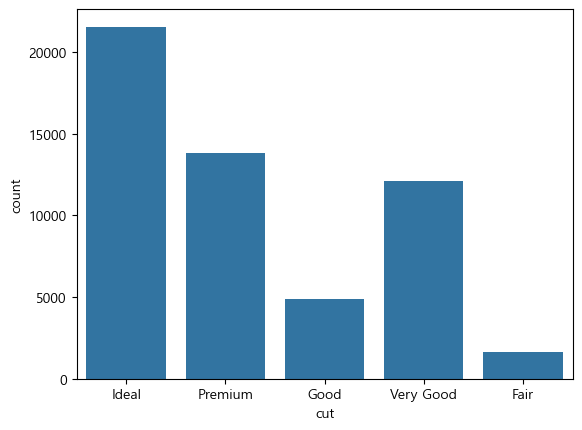

In [11]:
sns.countplot(x="cut", data=diamond_df)

<Axes: xlabel='color', ylabel='count'>

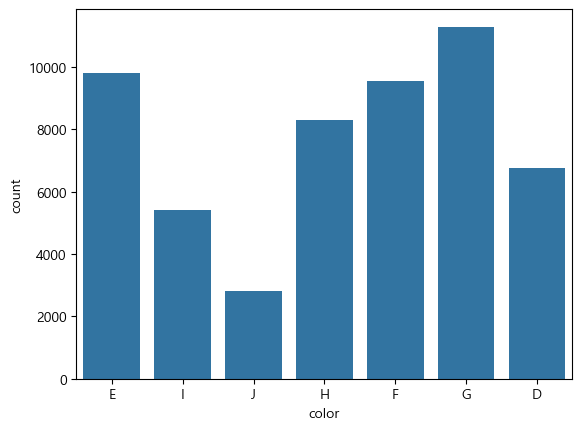

In [12]:
sns.countplot(x="color", data=diamond_df)

<Axes: xlabel='clarity', ylabel='count'>

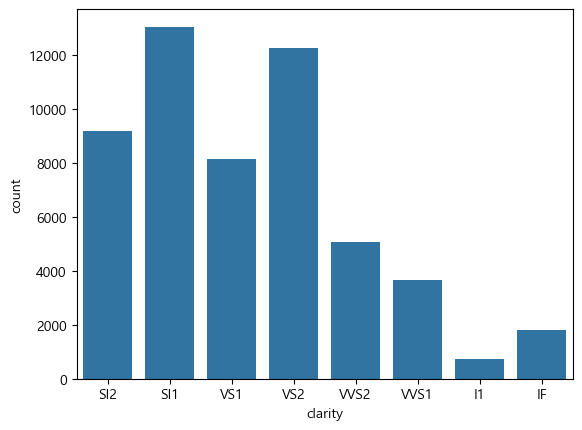

In [13]:
sns.countplot(x="clarity", data=diamond_df)

<Axes: >

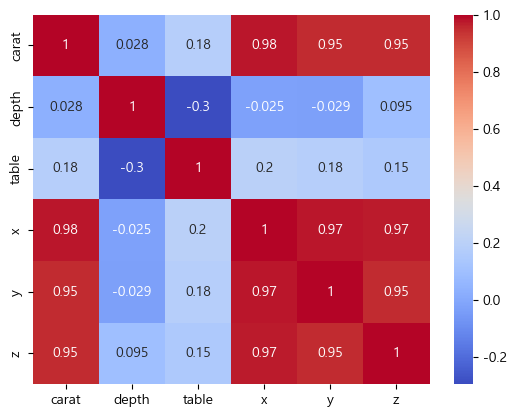

In [14]:
x_num_col_name = ['carat', 'depth', 'table', 'x', 'y', 'z']
x_num_col_df = diamond_df.loc[:, diamond_df.columns.isin(x_num_col_name)]
sns.heatmap(x_num_col_df.corr(), annot=True, cmap="coolwarm")

In [15]:
x_num_col_name = ['carat', 'depth', 'table']
x_num_col_df = diamond_df.loc[:, diamond_df.columns.isin(x_num_col_name)]
x_num_col_df

,carat,depth,table
0,0.23,61.5,55.0
1,0.21,59.8,61.0
2,0.23,56.9,65.0
3,0.29,62.4,58.0
4,0.31,63.3,58.0
...,...,...,...
53935,0.72,60.8,57.0
53936,0.72,63.1,55.0
53937,0.70,62.8,60.0
53938,0.86,61.0,58.0


<Axes: >

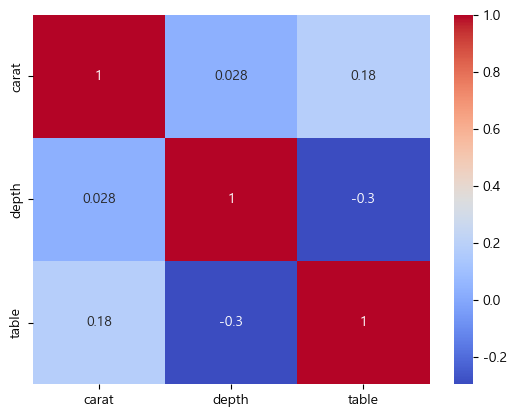

In [16]:
sns.heatmap(x_num_col_df.corr(), annot=True, cmap="coolwarm")

In [17]:
diamond_df.drop(["x", "y", "z"], axis=1, inplace=True)


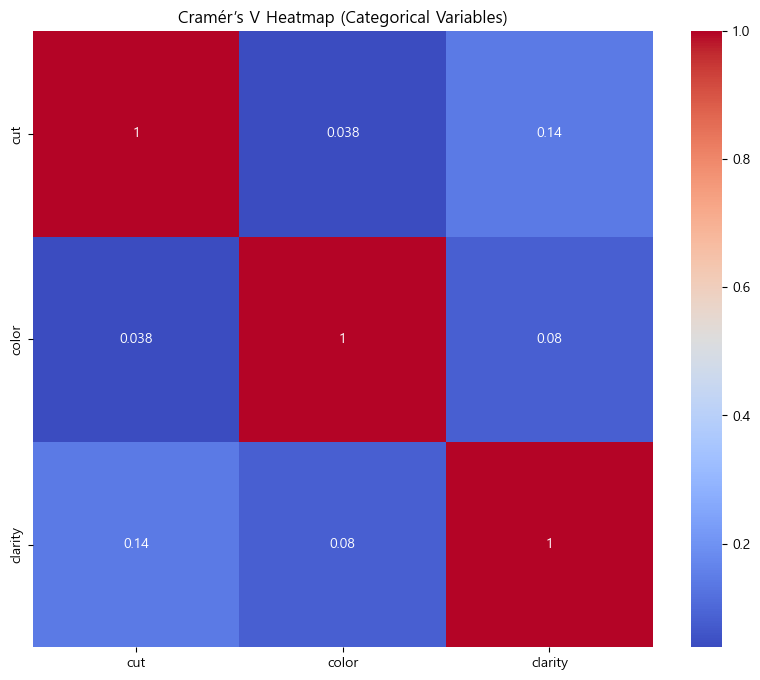

In [18]:
x_cat_name = ["cut", "color", "clarity"]
import scipy.stats as stats
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))
cramers_results = pd.DataFrame(index=x_cat_name, columns=x_cat_name)

for var1 in x_cat_name:
    for var2 in x_cat_name:
        if var1 == var2:
            cramers_results.loc[var1, var2] = 1.0
        else:
            cramers_results.loc[var1, var2] = cramers_v(diamond_df[var1], diamond_df[var2])

cramers_results = cramers_results.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm')
plt.title("Cramér’s V Heatmap (Categorical Variables)")
plt.show()

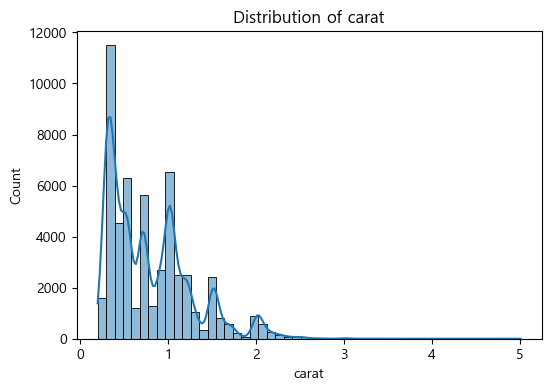

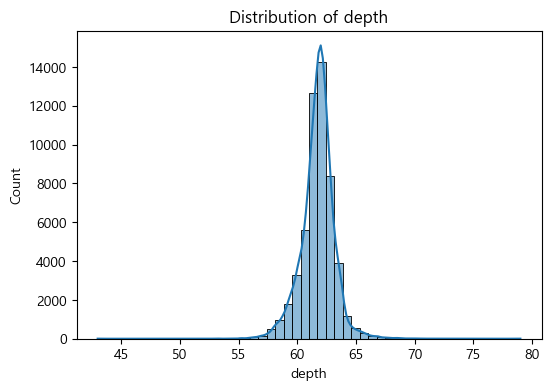

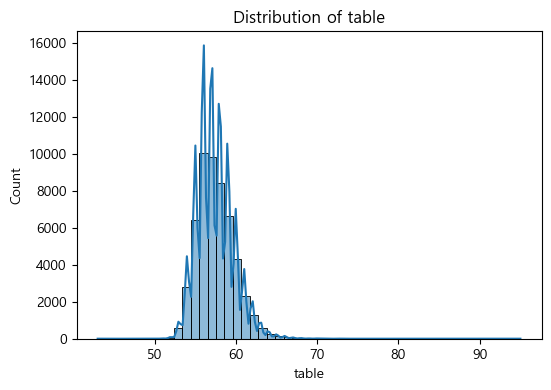

In [19]:
for col in x_num_col_name:
    plt.figure(figsize=(6, 4))
    sns.histplot(diamond_df[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.show()

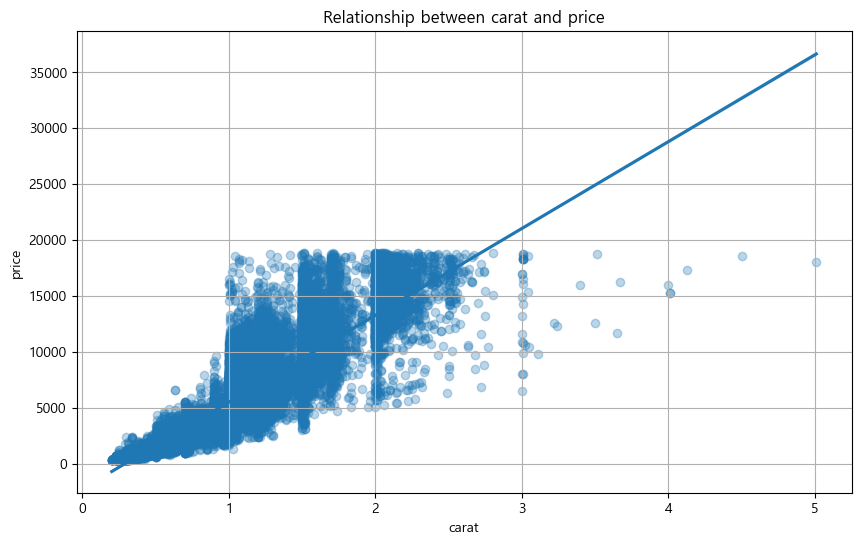

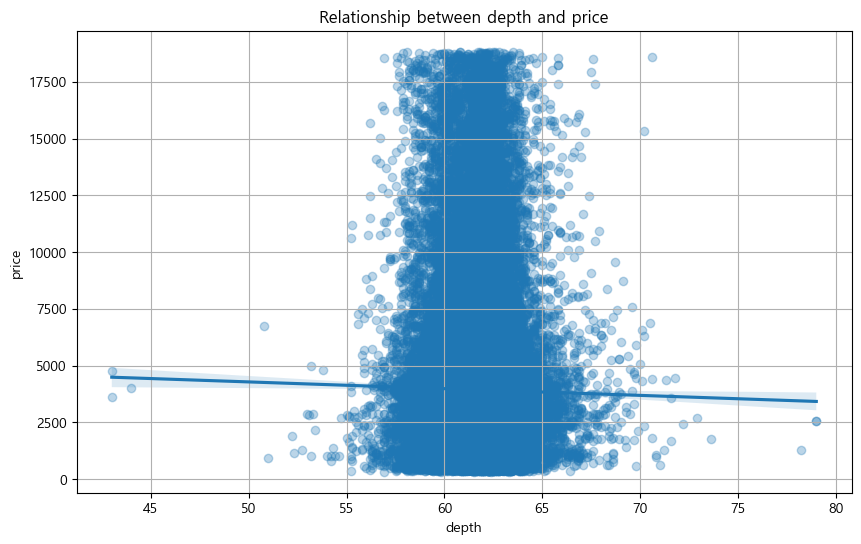

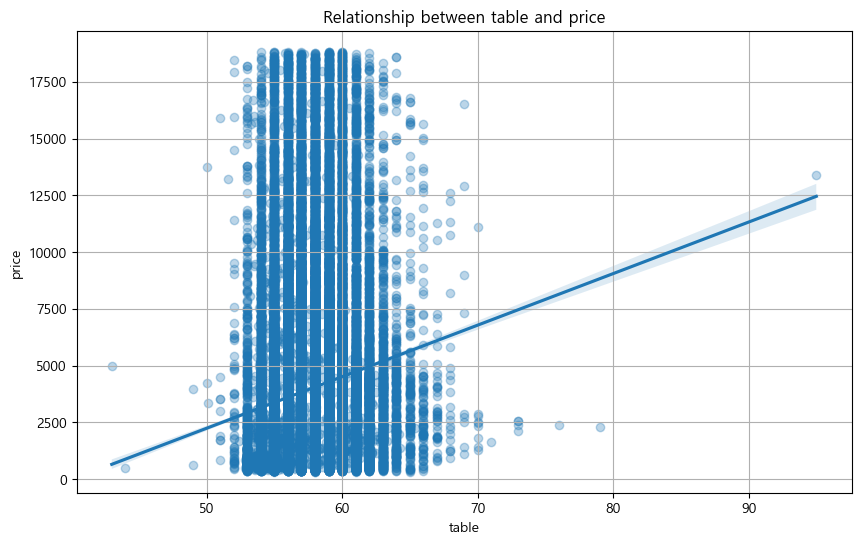

In [20]:
for idx, col in enumerate(x_num_col_df.columns):
	plt.figure(figsize=(10, 6))
	sns.regplot(data=diamond_df, x=col, y='price', scatter_kws={'alpha':0.3})
	plt.title(f'Relationship between {col} and price')
	plt.xlabel(col)
	plt.ylabel('price')
	plt.grid(True)
	plt.show()

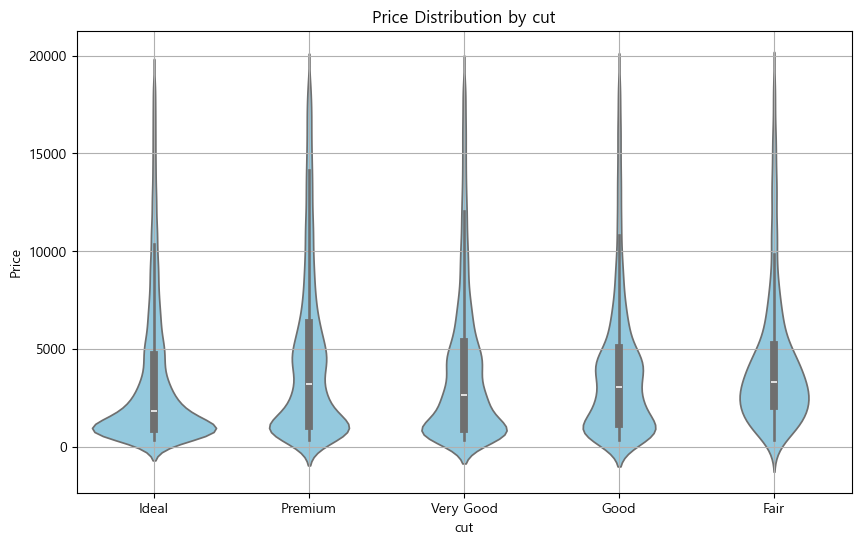

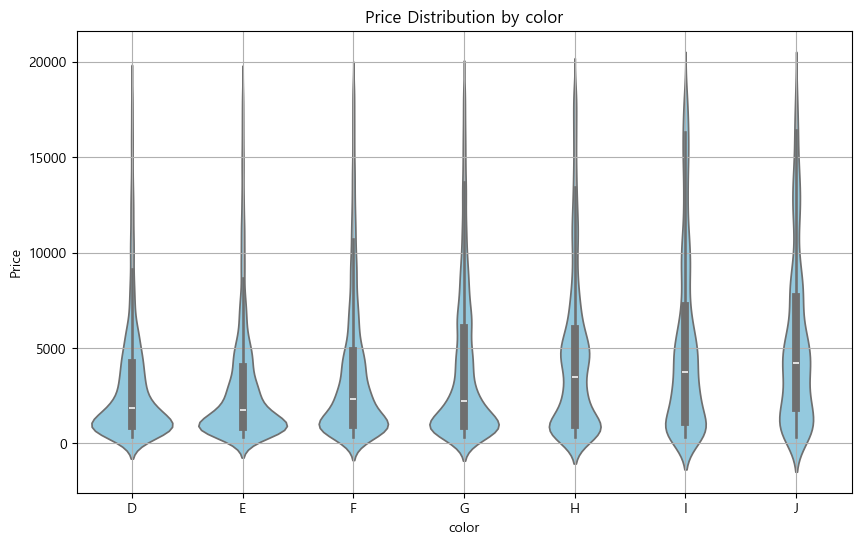

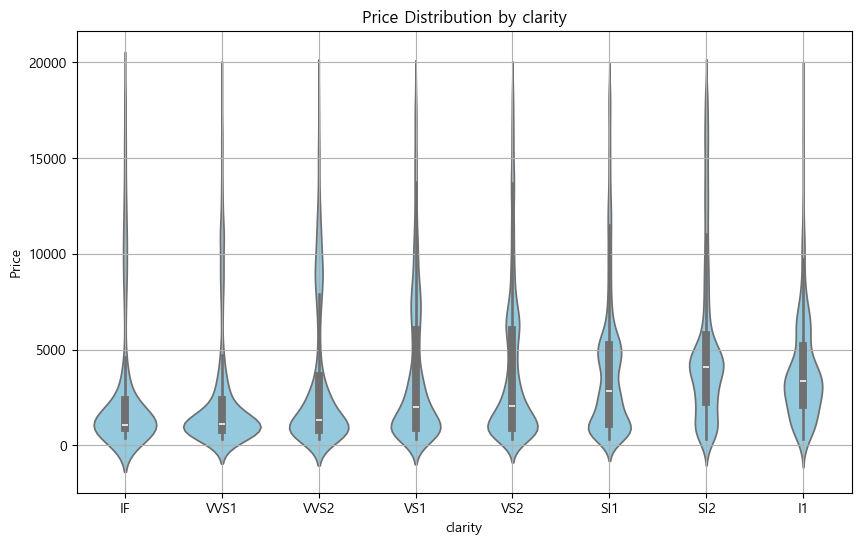

In [21]:
category_orders = {
	'cut': ["Ideal", "Premium", "Very Good", "Good", "Fair"],
	'color': ["D", "E", "F", "G", "H", "I", "J"],
	'clarity': ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"]
}

for idx, col in enumerate(x_cat_name):
	plt.figure(figsize=(10, 6))
	sns.violinplot(data=diamond_df, x=col, y='price', order=category_orders[col], color='skyblue')
	plt.title(f'Price Distribution by {col}')
	plt.xlabel(col)
	plt.ylabel('Price')
	plt.grid(True)
	plt.show()

In [22]:
print(diamond_df[x_num_col_name].skew())      # 비대칭성
print(diamond_df[x_num_col_name].kurtosis())  # 뾰족함

carat    1.116646
depth   -0.082294
table    0.796896
dtype: float64
carat    1.256635
depth    5.739415
table    2.801857
dtype: float64


In [23]:
# 왜도 보정
diamond_df['carat'] = np.log1p(diamond_df['carat'])

log_scaled_cols = ['carat']

diamond_df[log_scaled_cols] = StandardScaler().fit_transform(diamond_df[log_scaled_cols])


In [24]:
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import kurtosis

# depth 컬럼에 Quantile 변환 적용
transformed_depth = QuantileTransformer(output_distribution='normal', random_state=0)
transformed_depth = transformed_depth.fit_transform(pd.DataFrame(diamond_df["depth"]))

# 커토시스 확인
kurt_depth = kurtosis(transformed_depth)

# 적용
diamond_df["depth"] = transformed_depth

print("Transformed kurtosis (depth):", kurt_depth)


Transformed kurtosis (depth): [0.00575543]


In [25]:
print(diamond_df[x_num_col_name].skew())      # 비대칭성
print(diamond_df[x_num_col_name].kurtosis())  # 뾰족함

carat    0.580654
depth    0.004352
table    0.796896
dtype: float64
carat   -0.444807
depth    0.005867
table    2.801857
dtype: float64


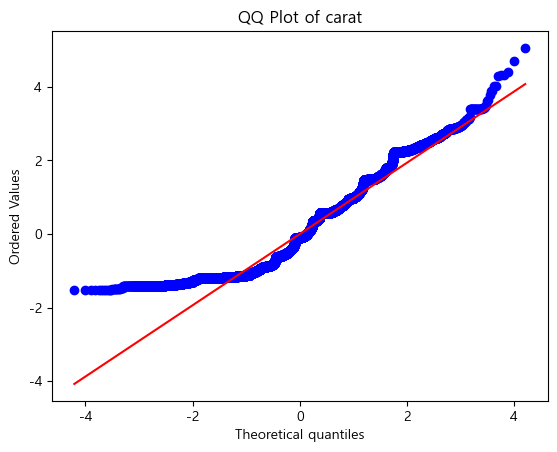

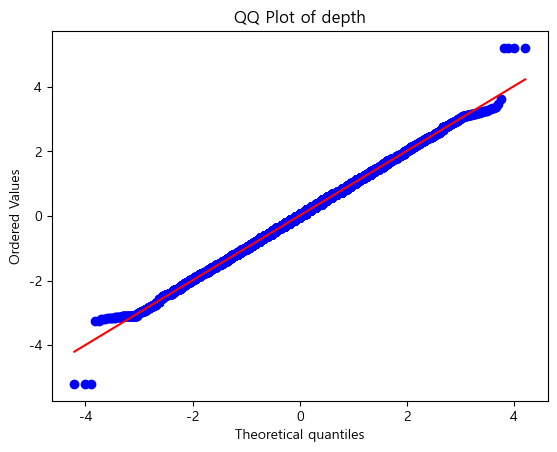

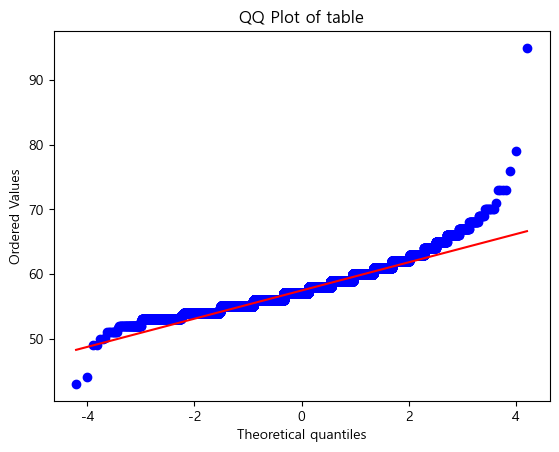

In [26]:
import scipy.stats as stats
import matplotlib.pyplot as plt

for col in x_num_col_name:
    plt.figure()
    stats.probplot(diamond_df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}')
    plt.show()

In [27]:
# 원-핫 인코딩
diamond_df = pd.get_dummies(diamond_df, columns=["cut", "color", "clarity"])
diamond_df

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.422530,-0.304482,55.0,326,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,-1.489484,-1.391202,61.0,326,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,-1.422530,-2.747453,65.0,327,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,-1.228012,0.574595,58.0,334,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
4,-1.165179,1.310017,58.0,335,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.053090,-0.835558,57.0,2757,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,-0.053090,1.176890,55.0,2757,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53937,-0.100858,0.931971,60.0,2757,False,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False
53938,0.266500,-0.697507,58.0,2757,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [28]:
diamond_df.shape

(53940, 24)

In [30]:
# 전처리 후 CSV파일로 저장
diamond_df
diamond_df.to_csv("diamond_refined.csv")